# Vocabulary visualizations per region

In [1]:
using Pkg
Pkg.activate(".")
#Pkg.add(["Plots", "CSV", "DataFrames", "SimilaritySearch", "TextSearch", "Formatting", "Latexify", "UMAP"])
using Plots, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify, UMAP, SimilaritySearch

  Activating project at `~/Research/RegionalSpanish/notebooks`


In [2]:
CSV.read("../data/SpanishLang/voc-stats.tsv.gz", DataFrame, delim='\t')

,country_code,n,rawvoc,voc
,String3,Int64,Int64,Int64
1,AR,173484321,4152406,776495
2,BO,1017454,215360,65902
3,BR,5399045,680019,143428
4,CA,1088816,276677,74122
5,CL,37390829,1696079,357257
6,CO,50065602,1972675,409282
7,CR,5810218,422495,121682
8,CU,339704,108763,32801
9,DO,6353261,583040,151212


In [3]:
V = CSV.read("../data/SpanishLang/voc.tsv.gz", DataFrame, delim='\t')
@info names(V)
cclist = unique(V.country_code)
sort!(cclist)
@info cclist

┌ Info: ["token", "country_code", "ndocs", "idf"]
└ @ Main In[3]:2
┌ Info: String3["ALL", "AR", "BO", "BR", "CA", "CL", "CO", "CR", "CU", "DO", "EC", "ES", "FR", "GB", "GQ", "GT", "HN", "MX", "NI", "PA", "PE", "PR", "PY", "SV", "US", "UY", "VE"]
└ @ Main In[3]:5


In [4]:
voclist = Dict()

for g in groupby(V, :country_code)
    D = Dict{String,Float64}()
    voclist[g.country_code[1]] = D
    for row in eachrow(g)
         D[row.token] = row.ndocs
    end

    normalize!(D)
end


# top-20 most popular tokens by region

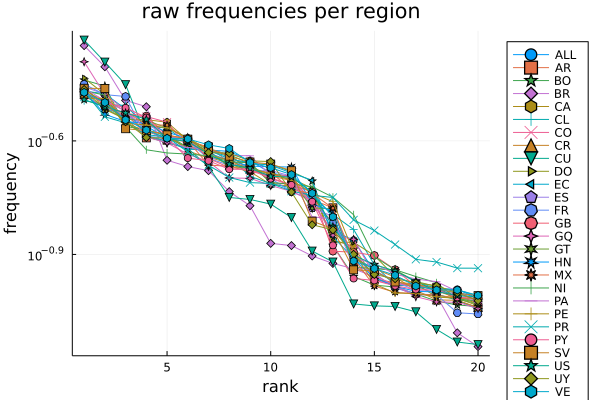

| region |    1 |     2 |    3 |     4 |     5 |     6 |    7 |    8 |     9 |   10 |    11 |    12 |     13 |    14 |     15 |   16 |   17 |    18 |       19 |       20 |
| ------:| ----:| -----:| ----:| -----:| -----:| -----:| ----:| ----:| -----:| ----:| -----:| -----:| ------:| -----:| ------:| ----:| ----:| -----:| --------:| --------:|
|    ALL |   de |  _usr |  que |     , |  _url |     . |   la |    y |     a |   en |    el |    no |  _htag |    me |     es |   se | _num |    .. |      con |      los |
|     AR |  que |    de |    , |  _usr |     a |    la |    y |   no |    me |   el |     . |    en |   _url |    se |    con |   es |   lo |    un |       mi |      los |
|     BO | _url |    de | _usr | _htag |    la |     , |    . |   en |   que |   el |     y |     a |     no |  _num |    los |   es |  por |    se |      del |       .. |
|     BR | _url |  _usr |   de |     , | _htag |   que |    a |    . |    no | _num |    .. |    la |      y |    me |     en |    ! |   el |     @ |      por |        o |
|     CA | _usr |    de |    . |   que |     , |  _url |    y |   la |     a |   el |    en |    no |  _htag |    es |     se |  los |   .. |    me |       un |      por |
|     CL |   de |  _usr | _url |     y |    en |     , |   la |  que |     . |    a |    el | _htag |   _num |    no |     .. |   es |  los |   con |       se |      por |
|     CO |   de |     . | _usr |   que |     , |  _url |   la |    y |    en |   el |     a |    no |  _htag |    es |     se |   me |  con |   por |      los |       .. |
|     CR |   de |   que | _usr |  _url |     , |     . |   la |    y |     a |   en |    el |    no |     me |    es |  _htag |   se |   un |  _num |      con |      por |
|     CU | _url | _htag |   de |    en |    la |     , | _usr |    . |    el |    y |     a |   que |   cuba |  _num |    del |  los |   .. |   por |       no |      con |
|     DO | _url |    de | _usr |     . |     , |   que |   en |   la |     y |   el | _htag |     a |     .. |    no |   _num |   es |  los |   con |      por |       se |
|     EC |   de |  _url | _usr |     . |     , |    la |   en |  que | _htag |    y |    el |     a |     no |  _num |     .. |   es |  los |   con |       se |      por |
|     ES | _usr |    de |  que |  _url |     , |     . |   la |    y |    en |    a |    el |    no |  _htag |    es |     .. |   me | _num |    lo |       un |      los |
|     FR | _usr |    de | _url |     . |     , |   que |   la |   en |     y |    a |    el | _htag |     no |    .. |     es |   un |   me |  _num |      los |      por |
|     GB | _usr |    de |  que |     . |     , |  _url |    y |   la |     a |   en |    el |    no |     me |    es |  _htag |   .. |   un |    lo |       se |      por |
|     GQ | _url |    de |    , |     . |    en |   que |   la |   el |     y | _usr |     a | _htag |     .. |    no | guinea |  los |   es |   por |   malabo |       un |
|     GT |   de |     . | _usr |   que |  _url |     , |   la |    y |    en |    a |    el | _htag |     no |    .. |     es | _num |   se |    me |      por |      los |
|     HN |   de |   que |    . |  _usr |  _url |     , |   la |    y |     a |   en |    el | _htag |     no |    es |     se | _num |  por |   los |       me |      con |
|     MX |   de |  _usr | _url |     , |   que |     . |    y |   la |     a |   en | _htag |    el |     no |    me |     es |   .. |   se |  _num |      por |      con |
|     NI |  que |    de |    , |  _usr |    la |     a | _url |    y |     . |   no |    en |    el |     me | _htag |     es |   se | _num |    mi |      con |      por |
|     PA |   de |  _usr | _url |     . |   que |    la |    , |    y |    en |   el |     a |    no |  _htag |    .. |     es |  los | _num |    se |      con |      por |
|     PE | _usr |    de |    , |     . |  _url |   que |   la |    y |    en |    a |    el | _htag |     no |    es |     se |   .. |  con |   los |     _num |      por |
|     PR | _url |     . |   en |    de |    la | _htag |    , | _num |   que |    a |  _usr |  rico | puerto |    el |      y |  mas |   no | _numa | posicion | ocupando |
|     PY |   de |  _url | _usr |   que |     , |    la |    . |    a |     y |   el |    en |    no |  _htag |    es |     .. | _num |   se |   por |        ) |      con |
|     SV | _usr |    de | _url |     . |     , |   que |   la |   el |     y |   en |     a |    no |  _htag |    es |    los |   se | _num |   por |       .. |      con |
|     US | _usr |    de | _url |   que |     , |     . |    y |   la |     a |   en |    el |    no |  _htag |    me |     es |   .. |   se |   los |      con |     _num |
|     UY |  que |    de |    , |     y |     a |    la |   no | _usr |    el |   me |    en |     . |   _url |    se |     es |  con |   un |    lo |     _num |      los |
|     VE |   de |  _usr | _url |     . |     , |    la |  que |    y |    en |   el |     a | _htag |     no |    es |   _num |  los |   .. |   con |       se |      por |


In [5]:
k = 20
display("text/markdown", """# top-$k most popular tokens by region""")
plot()
table = Matrix{String}(undef, length(cclist) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(cclist)
    voc = collect(voclist[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="rank", legend=:outertopright) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [6]:
for (cc, voc) in voclist
    normalize!(voc)
end

n = length(cclist)
A = Matrix{Float64}(undef, n, n)

dist = NormalizedCosineDistance()
@time for (i, cc) in enumerate(cclist)
    u = voclist[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = voclist[cclist[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)        
    end
end

  8.888729 seconds (22.24 k allocations: 1.170 MiB, 0.36% compilation time)


In [7]:
min_dist = 0.03
n_neighbors = 3
#metric = :precomputed

index = ExhaustiveSearch(; db=A, dist=L2Distance())
X = umap(index; n_neighbors, min_dist)
C = umap(index, 3; n_neighbors, min_dist)

#C .= C .+ 5

for i in (1, 2, 3)
    min_, max_ = extrema(C[i, :])
    # @info i => (min_, max_)
    for j in 1:size(C, 2)
        C[i, j] = (C[i, j] - min_) / (max_ - min_)
    end
end

C = [RGB(c...) for c in eachcol(C)]

(n, n_neighbors, n_components) = (27, 3, 2)
  0.017826 seconds (300 allocations: 4.688 KiB)
(n, n_neighbors, n_components) = (27, 3, 3)
  0.019037 seconds (300 allocations: 4.688 KiB)


*** computing allknn graph
*** computing graph
*** init embedding
*** fit ab / embedding
*** opt embedding
*** computing allknn graph
*** computing graph
*** init embedding
*** fit ab / embedding
*** opt embedding


# Spanish language vocabulary visualization (UMAP) per region

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies/emojis.



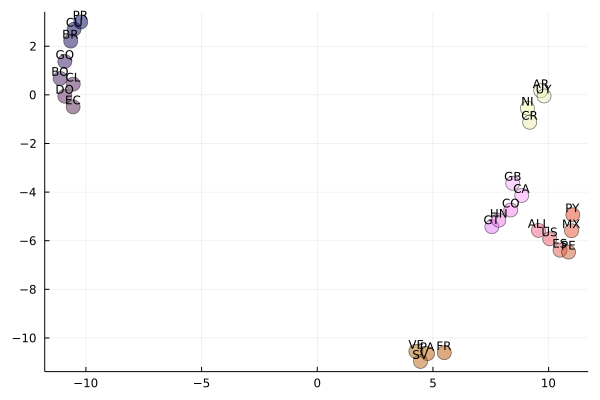

In [11]:
scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(cclist, :bottom, 8), ms=8, ma=0.5, la=0.5, alpha=0.5, fmt=:png)